In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv   

# To draw graph in notebook
%matplotlib inline

# To create grid in graph 
plt.style.use('ggplot')
sns.set_palette("husl")

In [30]:
# Import data

problemA = pd.read_csv('problemA.csv')

In [50]:
problemA

,Agent Name,Timestamp,Driver ID,Day
0,Ricky,2017-05-08 11:30:03.05+07,1000094,2017-05-08
1,Mamat,2017-05-14 23:16:35.368+07,1001006,2017-05-14
2,Tono,2017-05-11 13:36:37.733+07,1000482,2017-05-11
3,Bayu,2017-05-08 11:12:38.463+07,1000026,2017-05-08
4,Lila,2017-05-09 11:48:13.452+07,1000181,2017-05-09
5,Tono,2017-05-12 12:33:03.14+07,1000620,2017-05-12
6,Ricky,2017-05-08 11:14:34.247+07,1000069,2017-05-08
7,Ricky,2017-05-14 11:38:18.061+07,1000891,2017-05-14
8,Ricky,2017-05-14 12:11:58.665+07,1000913,2017-05-14
9,Sarah,2017-05-08 11:14:32.765+07,1000055,2017-05-08


In [58]:
problemA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 4 columns):
Agent Name    1037 non-null object
Timestamp     1037 non-null object
Driver ID     1037 non-null int64
Day           1037 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 32.5+ KB


In [38]:
problemA['Day'] = pd.to_datetime(problemA['Day'], format ='%Y-%m-%d')

In [39]:
problemA_count = problemA['Agent Name'].value_counts()
problemA_count = pd.DataFrame(problemA_count).reset_index()
problemA_count.columns = ['Agent Name', 'count']
problemA_count

,Agent Name,count
0,Ricky,365
1,Mamat,191
2,Bayu,125
3,Sarah,119
4,Lila,119
5,Tono,118


In [48]:
problemA_day = problemA['Day'].value_counts()
problemA_day = pd.DataFrame(problemA_day).reset_index()
problemA_day.columns = ['Day', 'count']
problemA_day

,Day,count
0,2017-05-14,170
1,2017-05-09,167
2,2017-05-08,150
3,2017-05-11,145
4,2017-05-12,145
5,2017-05-10,140
6,2017-05-13,120


[Text(0, 0, '2017-05-08T00:00:00.000000000'),
 Text(0, 0, '2017-05-09T00:00:00.000000000'),
 Text(0, 0, '2017-05-10T00:00:00.000000000'),
 Text(0, 0, '2017-05-11T00:00:00.000000000'),
 Text(0, 0, '2017-05-12T00:00:00.000000000'),
 Text(0, 0, '2017-05-13T00:00:00.000000000'),
 Text(0, 0, '2017-05-14T00:00:00.000000000')]

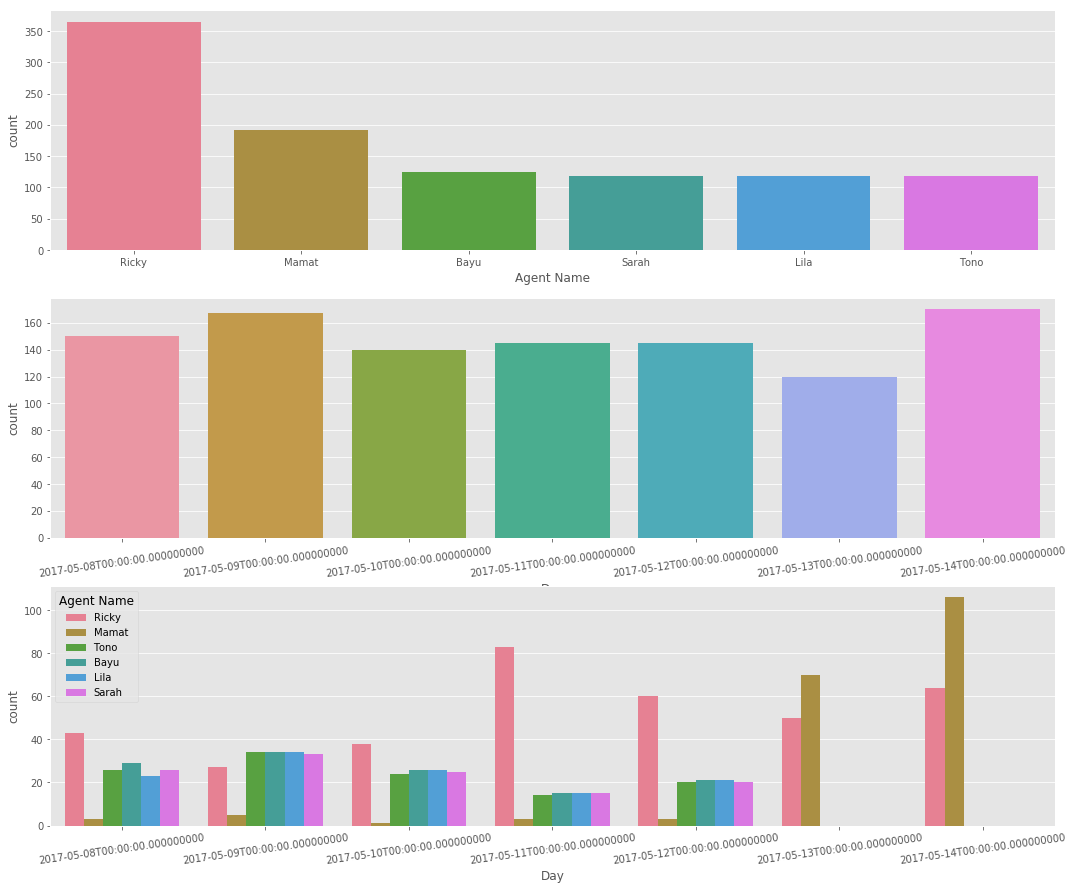

In [62]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18,15)

sns.barplot(data=problemA_count, x="Agent Name", y="count", ax=ax1)
sns.barplot(data=problemA_day, x="Day", y="count", ax=ax2).set_xticklabels(b.get_xticklabels(), rotation=8) 
sns.countplot(x="Day", hue="Agent Name", data=problemA).set_xticklabels(b.get_xticklabels(), rotation=8) 


[Text(0, 0, '2017-05-08T00:00:00.000000000'),
 Text(0, 0, '2017-05-09T00:00:00.000000000'),
 Text(0, 0, '2017-05-10T00:00:00.000000000'),
 Text(0, 0, '2017-05-11T00:00:00.000000000'),
 Text(0, 0, '2017-05-12T00:00:00.000000000'),
 Text(0, 0, '2017-05-13T00:00:00.000000000'),
 Text(0, 0, '2017-05-14T00:00:00.000000000')]

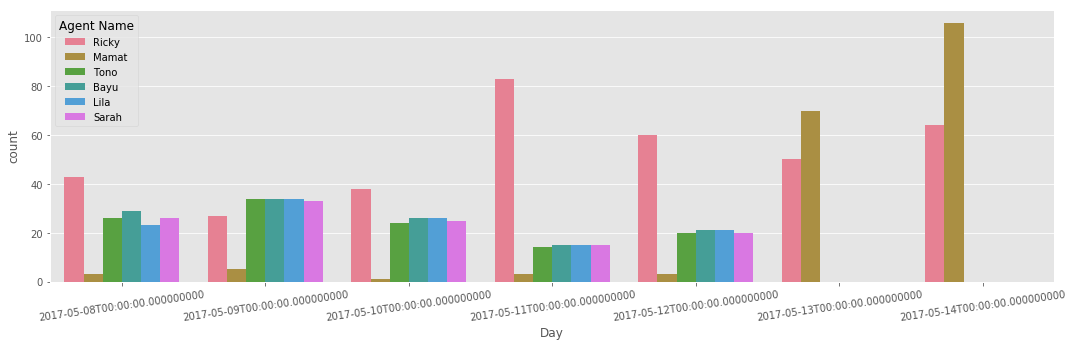

In [77]:
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,5)


sns.countplot(x="Day", hue="Agent Name", data=problemA).set_xticklabels(b.get_xticklabels(), rotation=8)

